## 1. Import Required Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

## 2. Load Raw Data

In [2]:
df = pd.read_csv('../data/raw/admission.csv')
print(f"Dataset loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"File size: {df.memory_usage().sum() / 1024:.2f} KB")

Dataset loaded successfully: 500 rows, 9 columns
File size: 35.29 KB


## 3. Data Overview and Basic Statistics

In [3]:
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("Column Names:")
print(df.columns.tolist())
print("\n" + "="*50)
print("First 5 rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None

Column Names:
['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

First 5 rows:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## 4. Missing Values Analysis

Missing Values Summary:
                   Missing Count  Percentage
Serial No.                     0         0.0
GRE Score                      0         0.0
TOEFL Score                    0         0.0
University Rating              0         0.0
SOP                            0         0.0
LOR                            0         0.0
CGPA                           0         0.0
Research                       0         0.0
Chance of Admit                0         0.0


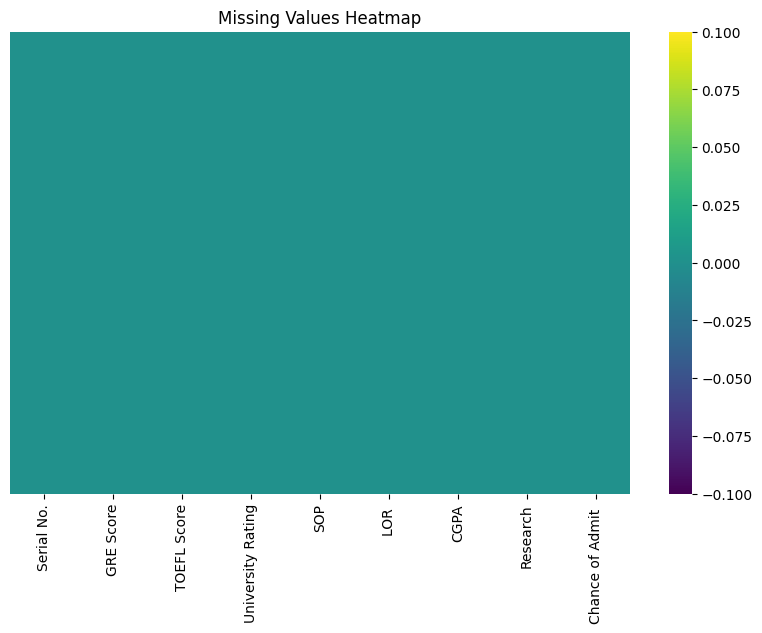

In [5]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percentage
})

print("Missing Values Summary:")
print(missing_df)

# Visualization of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## 5. Data Types and Distribution Analysis

Data Types:
Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Numeric columns: ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']


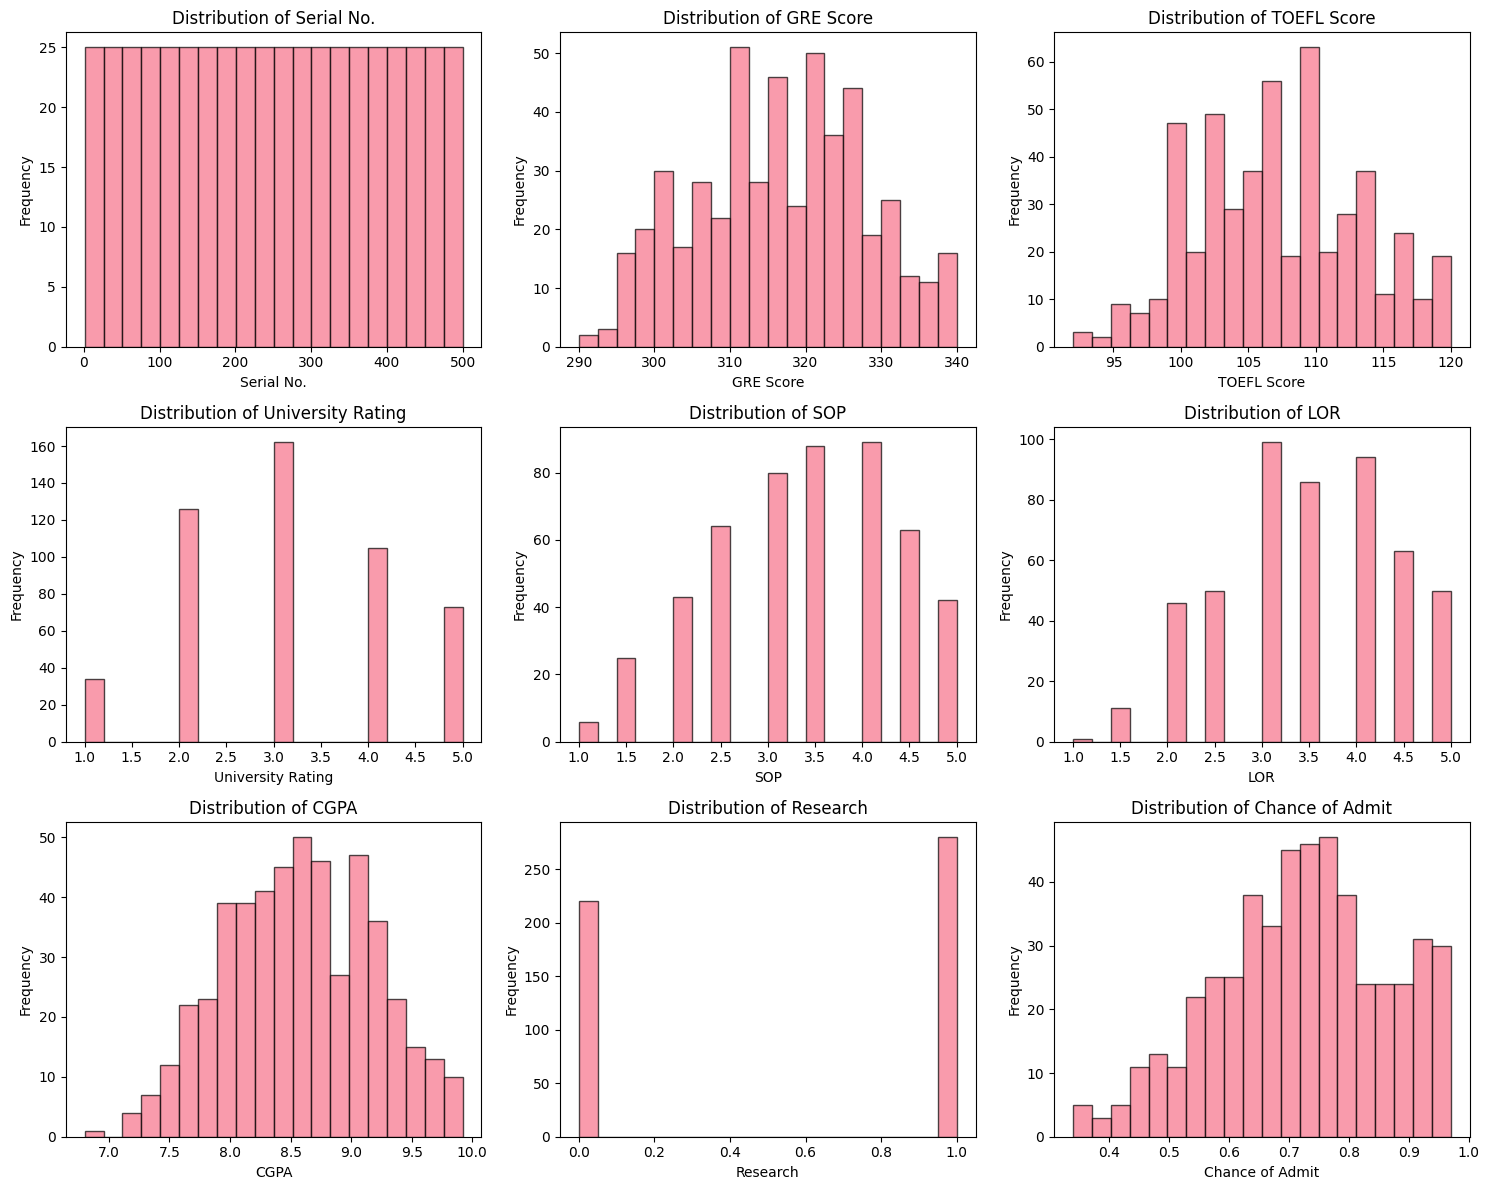

In [6]:
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50)

# Clean column names (remove trailing spaces)
df.columns = df.columns.str.strip()

# Select numeric columns for analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numeric columns: {list(numeric_cols)}")

# Distribution plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        axes[i].hist(df[col], bins=20, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

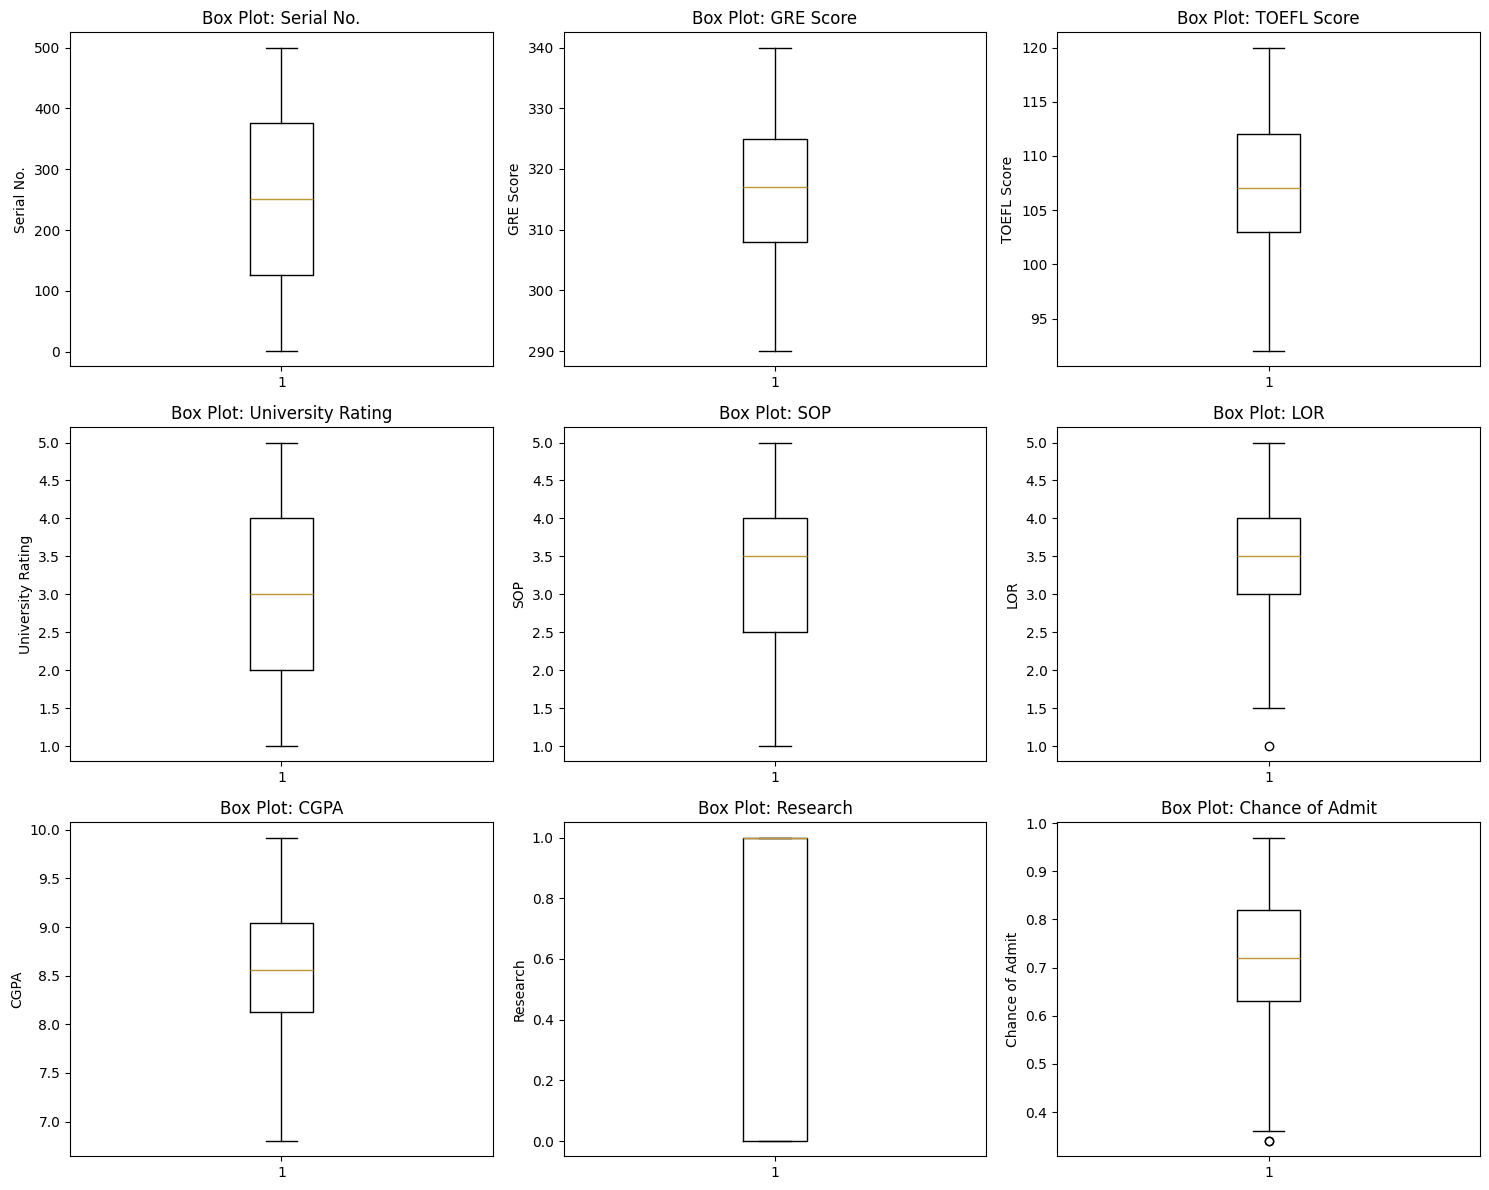

In [7]:
# Box plots for outlier visualization
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        axes[i].boxplot(df[col])
        axes[i].set_title(f'Box Plot: {col}')
        axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## 6. Outlier Detection

In [8]:
# IQR method for outlier detection
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Outlier Analysis using IQR method:")
print("="*50)

outlier_summary = []
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Column': col,
        'Outlier Count': outlier_count,
        'Percentage': f"{outlier_percentage:.2f}%",
        'Lower Bound': f"{lower:.2f}",
        'Upper Bound': f"{upper:.2f}"
    })
    
    print(f"{col}: {outlier_count} outliers ({outlier_percentage:.2f}%)")

outlier_df = pd.DataFrame(outlier_summary)
print("\nOutlier Summary Table:")
outlier_df

Outlier Analysis using IQR method:
Serial No.: 0 outliers (0.00%)
GRE Score: 0 outliers (0.00%)
TOEFL Score: 0 outliers (0.00%)
University Rating: 0 outliers (0.00%)
SOP: 0 outliers (0.00%)
LOR: 1 outliers (0.20%)
CGPA: 0 outliers (0.00%)
Research: 0 outliers (0.00%)
Chance of Admit: 2 outliers (0.40%)

Outlier Summary Table:


,Column,Outlier Count,Percentage,Lower Bound,Upper Bound
0,Serial No.,0,0.00%,-248.50,749.50
1,GRE Score,0,0.00%,282.50,350.50
2,TOEFL Score,0,0.00%,89.50,125.50
3,University Rating,0,0.00%,-1.00,7.00
4,SOP,0,0.00%,0.25,6.25
5,LOR,1,0.20%,1.50,5.50
6,CGPA,0,0.00%,6.76,10.41
7,Research,0,0.00%,-1.50,2.50
8,Chance of Admit,2,0.40%,0.35,1.10


## 7. Correlation Analysis

Correlation Matrix:
                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.              1.000     -0.104       -0.142             -0.068   
GRE Score              -0.104      1.000        0.827              0.635   
TOEFL Score            -0.142      0.827        1.000              0.650   
University Rating      -0.068      0.635        0.650              1.000   
SOP                    -0.137      0.613        0.644              0.728   
LOR                    -0.004      0.525        0.542              0.609   
CGPA                   -0.074      0.826        0.811              0.705   
Research               -0.005      0.563        0.467              0.427   
Chance of Admit         0.009      0.810        0.792              0.690   

                     SOP    LOR   CGPA  Research  Chance of Admit  
Serial No.        -0.137 -0.004 -0.074    -0.005            0.009  
GRE Score          0.613  0.525  0.826     0.563            0.810  
TOEFL Score    

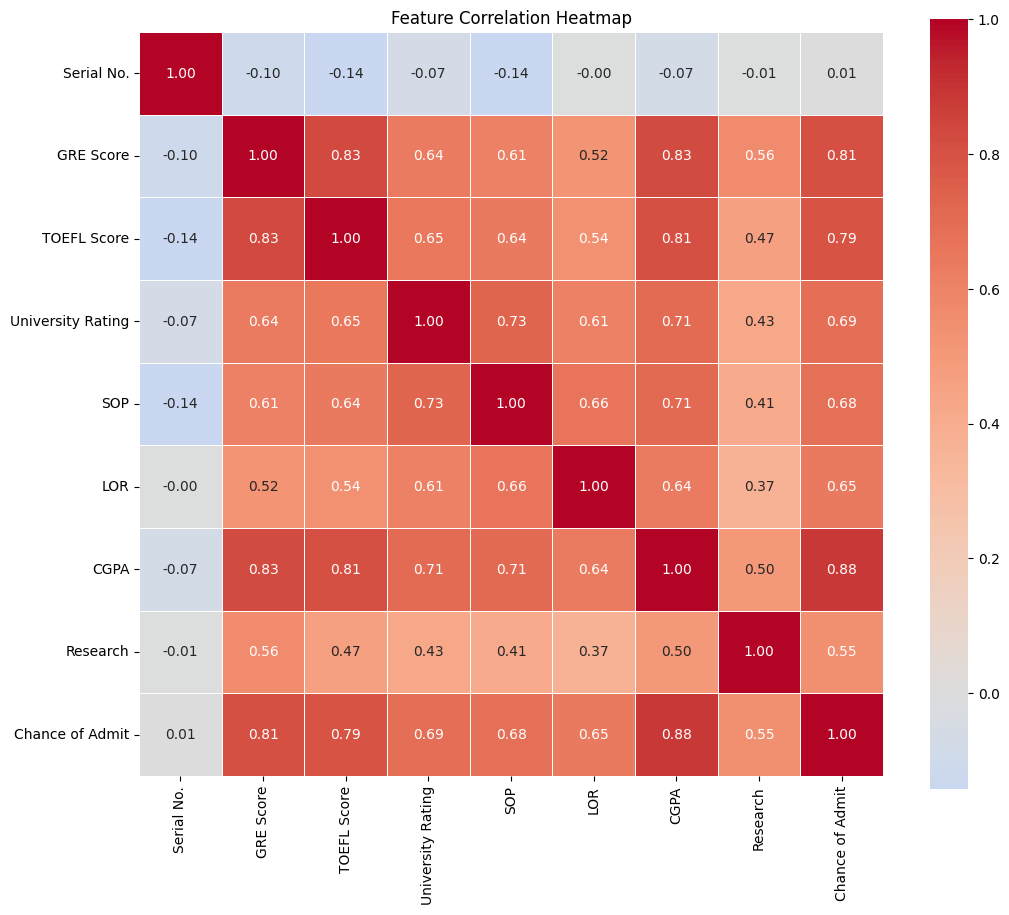


Strong Correlations (|r| > 0.5):
            Feature 1          Feature 2  Correlation
0           GRE Score        TOEFL Score        0.827
1           GRE Score  University Rating        0.635
2           GRE Score                SOP        0.613
3           GRE Score                LOR        0.525
4           GRE Score               CGPA        0.826
5           GRE Score           Research        0.563
6           GRE Score    Chance of Admit        0.810
7         TOEFL Score  University Rating        0.650
8         TOEFL Score                SOP        0.644
9         TOEFL Score                LOR        0.542
10        TOEFL Score               CGPA        0.811
11        TOEFL Score    Chance of Admit        0.792
12  University Rating                SOP        0.728
13  University Rating                LOR        0.609
14  University Rating               CGPA        0.705
15  University Rating    Chance of Admit        0.690
16                SOP                LOR        

In [13]:
# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Strong correlations (above 0.5 or below -0.5)
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            strong_corr.append({
                'Feature 1': col1,
                'Feature 2': col2,
                'Correlation': round(corr_val, 3)
            })

if strong_corr:
    print("\nStrong Correlations (|r| > 0.5):")
    strong_corr_df = pd.DataFrame(strong_corr)
    print(strong_corr_df)
else:
    print("\nNo strong correlations found (|r| > 0.5)")

## 8. Feature Engineering Opportunities

In [10]:
# Example feature engineering ideas
print("Potential New Features:")
print("="*30)

# Combined academic score
if 'GRE Score' in df.columns and 'TOEFL Score' in df.columns and 'CGPA' in df.columns:
    df['Academic_Score'] = (df['GRE Score'] * 0.4 + df['TOEFL Score'] * 0.3 + df['CGPA'] * 10 * 0.3)
    print("1. Academic_Score: Weighted combination of GRE, TOEFL, and CGPA")

# Application strength
if 'SOP' in df.columns and 'LOR' in df.columns:
    df['Application_Strength'] = (df['SOP'] + df['LOR']) / 2
    print("2. Application_Strength: Average of SOP and LOR ratings")

# Research experience binary
if 'Research' in df.columns:
    df['Has_Research'] = df['Research'].astype(bool)
    print("3. Has_Research: Boolean indicator for research experience")

# University tier (based on rating)
if 'University Rating' in df.columns:
    df['University_Tier'] = pd.cut(df['University Rating'], 
                                  bins=[0, 2, 4, 5], 
                                  labels=['Low', 'Medium', 'High'])
    print("4. University_Tier: Categorical tiers based on university rating")

# Score ratios
if 'GRE Score' in df.columns and 'TOEFL Score' in df.columns:
    df['GRE_TOEFL_Ratio'] = df['GRE Score'] / df['TOEFL Score']
    print("5. GRE_TOEFL_Ratio: Ratio between GRE and TOEFL scores")

print(f"\nOriginal features: {len(numeric_cols)}")
print(f"Total features after engineering: {len(df.columns)}")
print(f"New features added: {len(df.columns) - len(numeric_cols)}")

Potential New Features:
1. Academic_Score: Weighted combination of GRE, TOEFL, and CGPA
2. Application_Strength: Average of SOP and LOR ratings
3. Has_Research: Boolean indicator for research experience
4. University_Tier: Categorical tiers based on university rating
5. GRE_TOEFL_Ratio: Ratio between GRE and TOEFL scores

Original features: 9
Total features after engineering: 14
New features added: 5


## 9. Data Quality Assessment

In [11]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Check value ranges and consistency
print("\nData Quality Checks:")
print("="*30)

# Check if scores are within expected ranges
if 'GRE Score' in df.columns:
    gre_range = df['GRE Score'].min(), df['GRE Score'].max()
    print(f"GRE Score range: {gre_range} (expected: 260-340)")

if 'TOEFL Score' in df.columns:
    toefl_range = df['TOEFL Score'].min(), df['TOEFL Score'].max()
    print(f"TOEFL Score range: {toefl_range} (expected: 0-120)")

if 'CGPA' in df.columns:
    cgpa_range = df['CGPA'].min(), df['CGPA'].max()
    print(f"CGPA range: {cgpa_range} (expected: 0-10)")

if 'University Rating' in df.columns:
    uni_range = df['University Rating'].min(), df['University Rating'].max()
    print(f"University Rating range: {uni_range} (expected: 1-5)")

if 'Chance of Admit' in df.columns:
    chance_range = df['Chance of Admit'].min(), df['Chance of Admit'].max()
    print(f"Chance of Admit range: {chance_range} (expected: 0-1)")

# Check for impossible values
print("\nData Consistency Checks:")
print("="*30)

# Basic sanity checks
issues = []
if 'CGPA' in df.columns:
    high_cgpa = df[df['CGPA'] > 10]
    if len(high_cgpa) > 0:
        issues.append(f"CGPA > 10: {len(high_cgpa)} records")

if 'Chance of Admit' in df.columns:
    invalid_prob = df[(df['Chance of Admit'] < 0) | (df['Chance of Admit'] > 1)]
    if len(invalid_prob) > 0:
        issues.append(f"Invalid probability values: {len(invalid_prob)} records")

if issues:
    for issue in issues:
        print(f"⚠️  {issue}")
else:
    print("✅ No major data quality issues detected")

# Summary statistics for data completeness
print(f"\nData Completeness: {((df.count().sum()) / (df.shape[0] * df.shape[1]) * 100):.1f}%")

Duplicate rows: 0

Data Quality Checks:
GRE Score range: (np.int64(290), np.int64(340)) (expected: 260-340)
TOEFL Score range: (np.int64(92), np.int64(120)) (expected: 0-120)
CGPA range: (np.float64(6.8), np.float64(9.92)) (expected: 0-10)
University Rating range: (np.int64(1), np.int64(5)) (expected: 1-5)
Chance of Admit range: (np.float64(0.34), np.float64(0.97)) (expected: 0-1)

Data Consistency Checks:
✅ No major data quality issues detected

Data Completeness: 100.0%


## 10. Preprocessing Strategy Recommendations

In [12]:
print("PREPROCESSING STRATEGY RECOMMENDATIONS")
print("="*50)

recommendations = []

# 1. Data Cleaning
if duplicates > 0:
    recommendations.append("🧹 Remove duplicate records")
else:
    recommendations.append("✅ No duplicate removal needed")

# 2. Missing Value Treatment
if missing_data.sum() > 0:
    recommendations.append("🔧 Handle missing values (imputation or removal)")
else:
    recommendations.append("✅ No missing values to handle")

# 3. Feature Scaling
recommendations.append("📊 Apply feature scaling (StandardScaler or MinMaxScaler)")
recommendations.append("   - Different features have different scales (GRE: 260-340, CGPA: 0-10)")

# 4. Outlier Treatment
outlier_cols = [col for col in numeric_cols 
                if len(detect_outliers_iqr(df, col)[0]) > len(df) * 0.05]
if outlier_cols:
    recommendations.append(f"🎯 Consider outlier treatment for: {', '.join(outlier_cols)}")
else:
    recommendations.append("✅ Outlier levels acceptable")

# 5. Feature Engineering
recommendations.append("🔨 Implement feature engineering:")
recommendations.append("   - Create composite academic score")
recommendations.append("   - Generate application strength metric")
recommendations.append("   - Add score ratios and categorical tiers")

# 6. Encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    recommendations.append(f"🏷️ Encode categorical features: {list(categorical_cols)}")

# 7. Train-Test Split Strategy
recommendations.append("✂️ Use stratified train-test split based on target variable")

# 8. Cross-Validation
recommendations.append("🔄 Implement k-fold cross-validation for model evaluation")

print("\nRECOMMENDED PREPROCESSING PIPELINE:")
print("-" * 40)
for i, rec in enumerate(recommendations, 1):
    print(f"{i:2d}. {rec}")

print("\n" + "="*50)
print("NEXT STEPS:")
print("1. Implement preprocessing pipeline in src/preprocessing.py")
print("2. Create data validation functions")
print("3. Set up automated data quality checks")
print("4. Prepare feature engineering module")
print("5. Configure model training pipeline")

PREPROCESSING STRATEGY RECOMMENDATIONS

RECOMMENDED PREPROCESSING PIPELINE:
----------------------------------------
 1. ✅ No duplicate removal needed
 2. ✅ No missing values to handle
 3. 📊 Apply feature scaling (StandardScaler or MinMaxScaler)
 4.    - Different features have different scales (GRE: 260-340, CGPA: 0-10)
 5. ✅ Outlier levels acceptable
 6. 🔨 Implement feature engineering:
 7.    - Create composite academic score
 8.    - Generate application strength metric
 9.    - Add score ratios and categorical tiers
10. 🏷️ Encode categorical features: ['University_Tier']
11. ✂️ Use stratified train-test split based on target variable
12. 🔄 Implement k-fold cross-validation for model evaluation

NEXT STEPS:
1. Implement preprocessing pipeline in src/preprocessing.py
2. Create data validation functions
3. Set up automated data quality checks
4. Prepare feature engineering module
5. Configure model training pipeline


## 11. Feature-Target Relationship Analysis

Analysis of relationships between selected features (correlation > 0.7) and target variable to validate linear regression approach.

Analyzing relationships for features: ['GRE Score', 'TOEFL Score', 'CGPA']
Target variable: Chance of Admit
Correlations with target:
  GRE Score: 0.810
  TOEFL Score: 0.792
  CGPA: 0.882


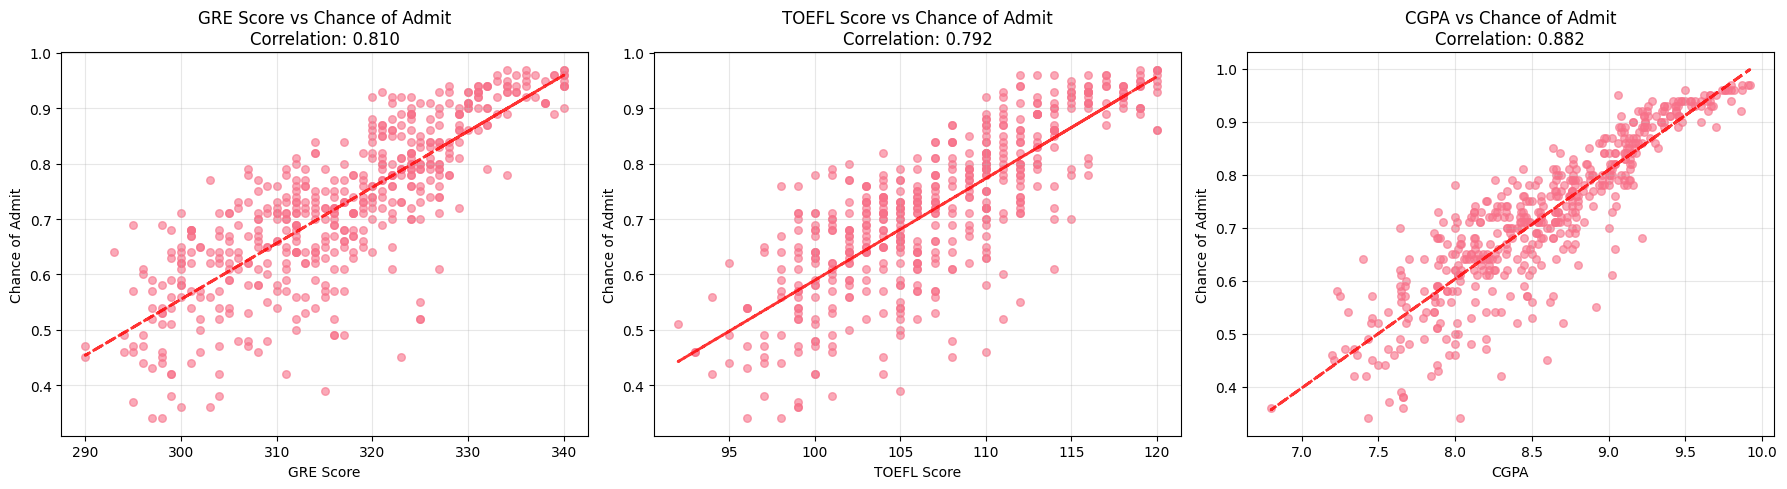

In [14]:
# Selected features based on correlation analysis (> 0.7)
selected_features = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit'

print(f"Analyzing relationships for features: {selected_features}")
print(f"Target variable: {target}")
print(f"Correlations with target:")
for feature in selected_features:
    corr = df[feature].corr(df[target])
    print(f"  {feature}: {corr:.3f}")

# Create scatter plots for each feature vs target
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(selected_features):
    axes[i].scatter(df[feature], df[target], alpha=0.6, s=30)
    
    # Add trend line
    z = np.polyfit(df[feature], df[target], 1)
    p = np.poly1d(z)
    axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)
    
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'{feature} vs {target}\nCorrelation: {df[feature].corr(df[target]):.3f}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

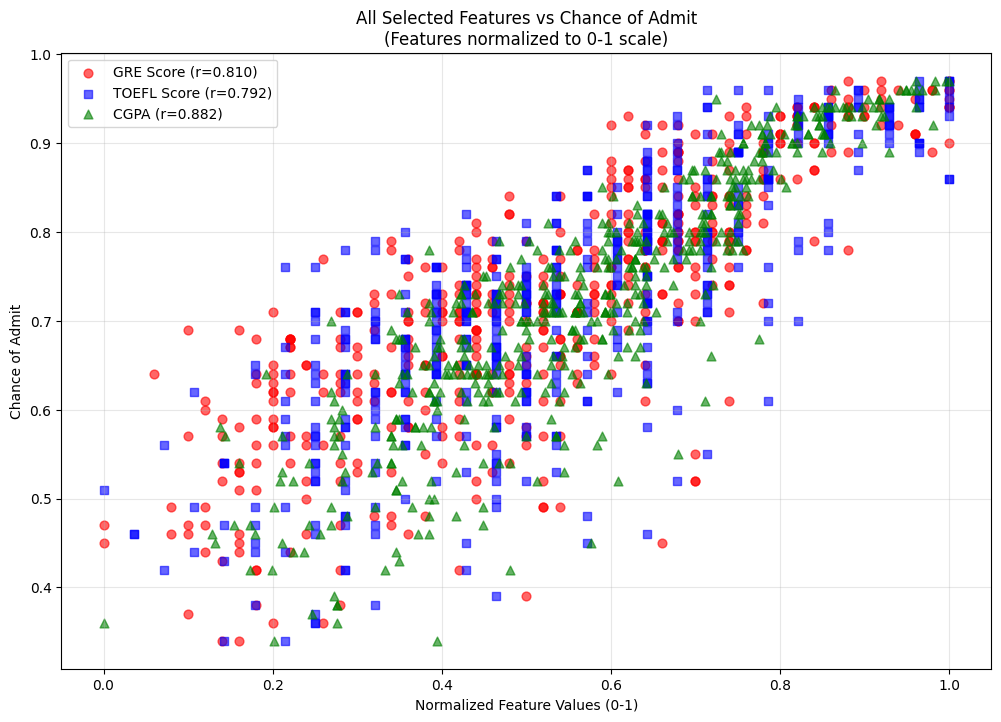

In [18]:
# Combined plot with all features
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']

for i, feature in enumerate(selected_features):
    # Normalize features for better visualization
    feature_norm = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())
    ax.scatter(feature_norm, df[target], 
              alpha=0.6, s=40, c=colors[i], marker=markers[i], 
              label=f'{feature} (r={df[feature].corr(df[target]):.3f})')

ax.set_xlabel('Normalized Feature Values (0-1)')
ax.set_ylabel(target)
ax.set_title('All Selected Features vs Chance of Admit\n(Features normalized to 0-1 scale)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

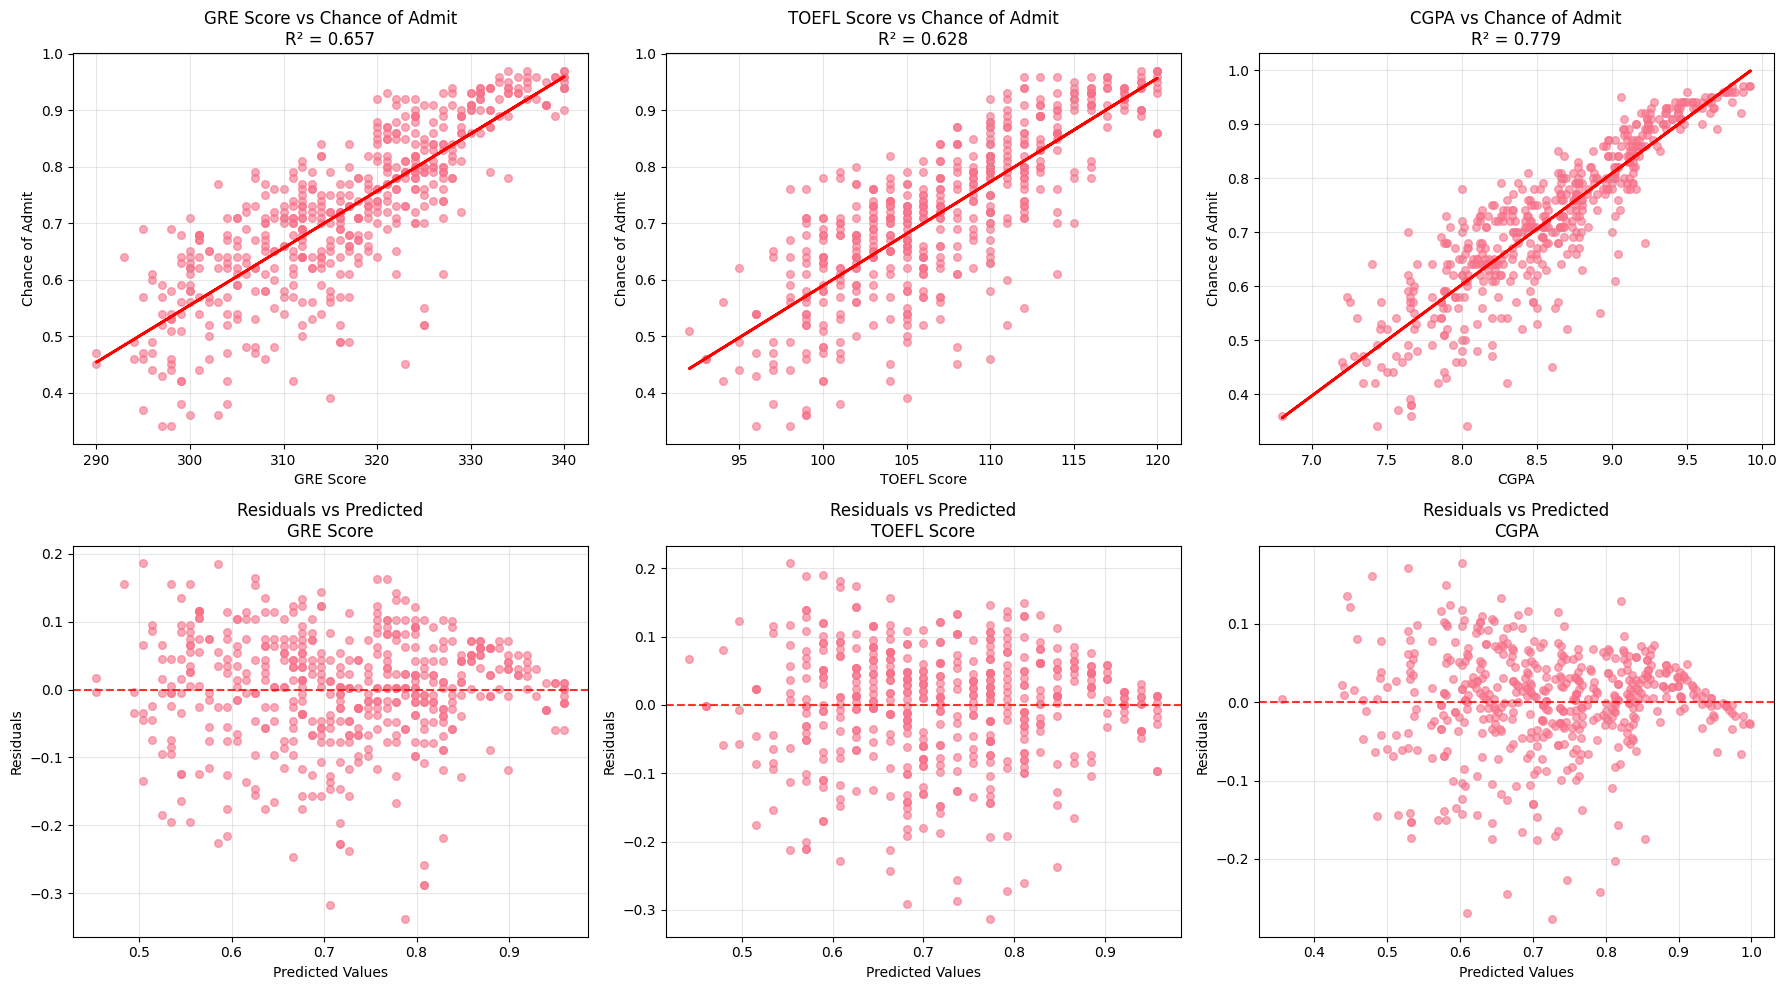

In [19]:
# Residual analysis to check linearity assumptions
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit simple linear regressions for each feature
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, feature in enumerate(selected_features):
    X = df[feature].values.reshape(-1, 1)
    y = df[target].values
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate residuals
    residuals = y - y_pred
    
    # Plot 1: Feature vs Target with regression line
    axes[0, i].scatter(df[feature], y, alpha=0.6, s=30)
    axes[0, i].plot(df[feature], y_pred, 'r-', linewidth=2)
    axes[0, i].set_xlabel(feature)
    axes[0, i].set_ylabel(target)
    axes[0, i].set_title(f'{feature} vs {target}\nR² = {r2_score(y, y_pred):.3f}')
    axes[0, i].grid(True, alpha=0.3)
    
    # Plot 2: Residuals vs Predicted values
    axes[1, i].scatter(y_pred, residuals, alpha=0.6, s=30)
    axes[1, i].axhline(y=0, color='r', linestyle='--', alpha=0.8)
    axes[1, i].set_xlabel('Predicted Values')
    axes[1, i].set_ylabel('Residuals')
    axes[1, i].set_title(f'Residuals vs Predicted\n{feature}')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Multiple Linear Regression Analysis:
R² Score: 0.8046
RMSE: 0.0623
MSE: 0.0039

Feature Coefficients:
  GRE Score: 0.0024
  TOEFL Score: 0.0032
  CGPA: 0.1436
Intercept: -1.5968


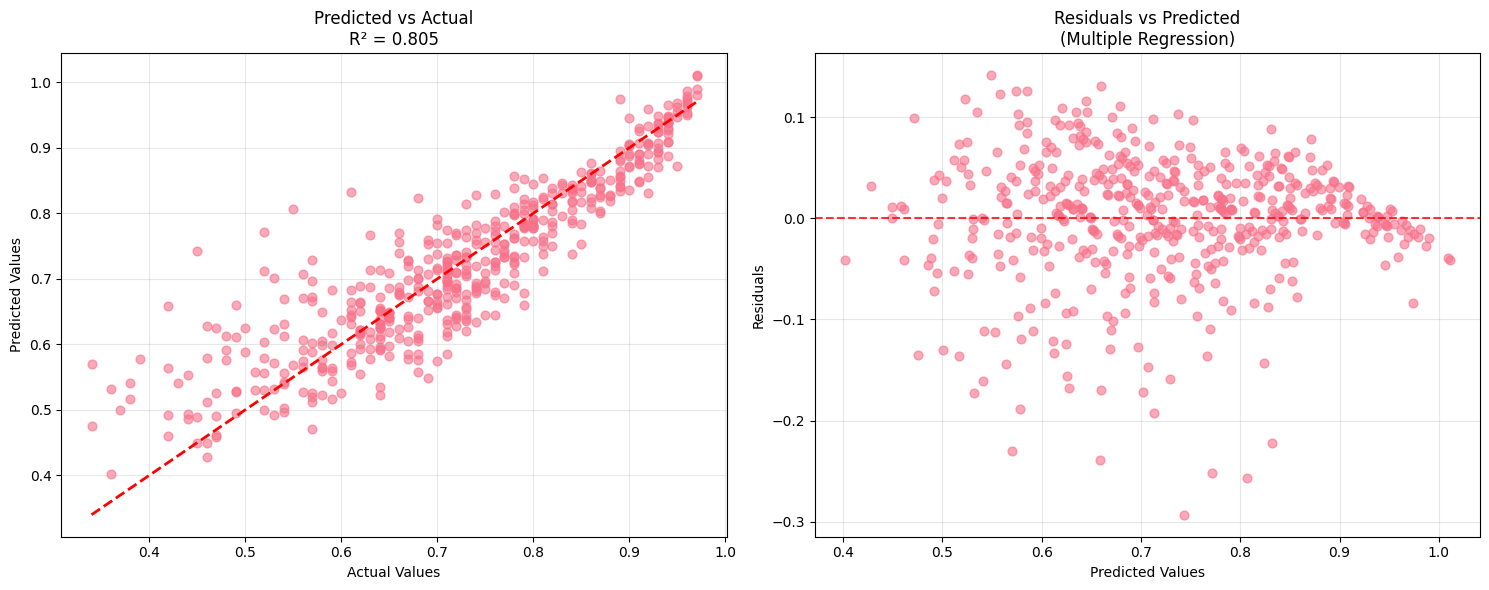

In [20]:
# Multiple regression analysis with all selected features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_multi = df[selected_features]
y_multi = df[target]

# Fit multiple linear regression
multi_model = LinearRegression()
multi_model.fit(X_multi, y_multi)
y_multi_pred = multi_model.predict(X_multi)

# Calculate metrics
r2_multi = r2_score(y_multi, y_multi_pred)
mse_multi = np.mean((y_multi - y_multi_pred) ** 2)
rmse_multi = np.sqrt(mse_multi)

print("Multiple Linear Regression Analysis:")
print("="*40)
print(f"R² Score: {r2_multi:.4f}")
print(f"RMSE: {rmse_multi:.4f}")
print(f"MSE: {mse_multi:.4f}")
print("\nFeature Coefficients:")
for feature, coef in zip(selected_features, multi_model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"Intercept: {multi_model.intercept_:.4f}")

# Plot predicted vs actual values
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Predicted vs Actual
axes[0].scatter(y_multi, y_multi_pred, alpha=0.6, s=40)
axes[0].plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'Predicted vs Actual\nR² = {r2_multi:.3f}')
axes[0].grid(True, alpha=0.3)

# Residuals vs Predicted
residuals_multi = y_multi - y_multi_pred
axes[1].scatter(y_multi_pred, residuals_multi, alpha=0.6, s=40)
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.8)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted\n(Multiple Regression)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [21]:
# Statistical tests for linearity assumptions
from scipy.stats import shapiro, jarque_bera

print("Statistical Analysis of Linear Regression Assumptions:")
print("="*55)

# Test for normality of residuals
shapiro_stat, shapiro_p = shapiro(residuals_multi)
jb_stat, jb_p = jarque_bera(residuals_multi)

print(f"1. Normality of Residuals:")
print(f"   Shapiro-Wilk Test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
print(f"   Jarque-Bera Test: statistic={jb_stat:.4f}, p-value={jb_p:.4f}")
if shapiro_p > 0.05:
    print("   ✅ Residuals appear normally distributed (p > 0.05)")
else:
    print("   ⚠️  Residuals may not be normally distributed (p ≤ 0.05)")

# Check for homoscedasticity (constant variance)
print(f"\n2. Homoscedasticity Check:")
print(f"   Residual range: [{residuals_multi.min():.4f}, {residuals_multi.max():.4f}]")
print(f"   Residual std: {residuals_multi.std():.4f}")

# Correlation between features and residuals (should be close to 0)
print(f"\n3. Feature-Residual Independence:")
for feature in selected_features:
    corr_res = df[feature].corr(pd.Series(residuals_multi))
    print(f"   {feature} - Residuals correlation: {corr_res:.4f}")

print(f"\n4. Model Performance Summary:")
print(f"   Multiple R²: {r2_multi:.4f} ({r2_multi*100:.1f}% variance explained)")
print(f"   RMSE: {rmse_multi:.4f}")
print(f"   Mean absolute error: {np.mean(np.abs(residuals_multi)):.4f}")

print(f"\n{'='*55}")
print("CONCLUSION:")
if r2_multi > 0.8 and shapiro_p > 0.05:
    print("✅ Linear regression is well-suited for this dataset!")
    print("   - High R² indicates good fit")
    print("   - Residuals are approximately normal")
    print("   - Strong linear relationships confirmed")
elif r2_multi > 0.7:
    print("✅ Linear regression is appropriate for this dataset")
    print("   - Good R² indicates acceptable fit")
    print("   - Linear relationships are evident")
else:
    print("⚠️  Consider alternative modeling approaches")
    print("   - R² suggests room for improvement")

Statistical Analysis of Linear Regression Assumptions:
1. Normality of Residuals:
   Shapiro-Wilk Test: statistic=0.9293, p-value=0.0000
   Jarque-Bera Test: statistic=279.9183, p-value=0.0000
   ⚠️  Residuals may not be normally distributed (p ≤ 0.05)

2. Homoscedasticity Check:
   Residual range: [-0.2931, 0.1414]
   Residual std: 0.0624

3. Feature-Residual Independence:
   GRE Score - Residuals correlation: 0.0000
   TOEFL Score - Residuals correlation: 0.0000
   CGPA - Residuals correlation: 0.0000

4. Model Performance Summary:
   Multiple R²: 0.8046 (80.5% variance explained)
   RMSE: 0.0623
   Mean absolute error: 0.0446

CONCLUSION:
✅ Linear regression is appropriate for this dataset
   - Good R² indicates acceptable fit
   - Linear relationships are evident
